In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 14.1 MB/s 
     |████████████████████████████████| 199 kB 57.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Over sampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:

import numpy as np
import pandas as pd

from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42


In [ ]:
data = pd.read_excel('L6.xlsx')

In [ ]:
sub_data = pd.read_excel('L7.xlsx')

In [ ]:
data.head()

,Text_files,L1,L2,L3,l4,L5,L6,L7,L8,L9,L10
0,Background .\nOver the past ten years oncologi...,0,0,0,0,0,0,1,0,0,1
1,Treatment for glioblastoma multiforme includes...,1,0,0,0,0,0,0,0,0,0
2,Prostate cancer ( PCA ) is the most common inv...,0,0,0,0,0,0,0,0,0,0
3,Splenic haemangiosarcomas ( HSAs ) from 122 do...,0,0,0,0,0,0,1,0,0,0
4,Application of adenovirus vectors ( Adv ) in m...,0,0,1,0,0,0,0,0,0,0


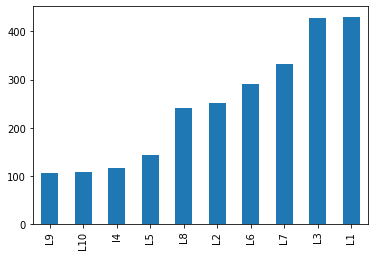

In [ ]:
ll = data.columns.tolist()[1:]
data[ll].sum().sort_values().plot(kind="bar");

In [ ]:
data['sum'] = data[ll].sum(axis=1)
data.head()

,Text_files,L1,L2,L3,l4,L5,L6,L7,L8,L9,L10,sum
0,Background .\nOver the past ten years oncologi...,0,0,0,0,0,0,1,0,0,1,2
1,Treatment for glioblastoma multiforme includes...,1,0,0,0,0,0,0,0,0,0,1
2,Prostate cancer ( PCA ) is the most common inv...,0,0,0,0,0,0,0,0,0,0,0
3,Splenic haemangiosarcomas ( HSAs ) from 122 do...,0,0,0,0,0,0,1,0,0,0,1
4,Application of adenovirus vectors ( Adv ) in m...,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
sub_data['sum'] = data[ll].sum(axis=1)
sub_data.head()

,Text_files,Activating invasion and metastasis--Invasion,Inducing angiogenesis--By deregulating angiogenesis--Angiogenic factors,Evading growth suppressors--By deregulating cell cycle checkpoints--,Evading growth suppressors--By deregulating cell cycle checkpoints--Cell cycle,Evading growth suppressors--By evading contact inhibition,Avoiding immune destruction--Immune response,Genomic instability and mutation--Mutation,Tumor promoting inflammation--Inflammation--,Resisting cell death--Apoptosis,...,Resisting cell death--Necrosis,Genomic instability and mutation--DNA damage--Strand breaks,Sustaining proliferative signaling--Receptors,Sustaining proliferative signaling--Growth factors growth promoting signals--Downstream signaling,Inducing angiogenesis--By deregulating angiogenesis,Activating invasion and metastasis--Metastasis,Tumor promoting inflammation--Inflammation--Oxidative stress,Enabling replicative immortality--Senescence,Resisting cell death--Autophagy,sum
0,Background .\nOver the past ten years oncologi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,Treatment for glioblastoma multiforme includes...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,Prostate cancer ( PCA ) is the most common inv...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Splenic haemangiosarcomas ( HSAs ) from 122 do...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Application of adenovirus vectors ( Adv ) in m...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_df

,Text_files,Activating invasion and metastasis--Invasion,Inducing angiogenesis--By deregulating angiogenesis--Angiogenic factors,Evading growth suppressors--By deregulating cell cycle checkpoints--,Evading growth suppressors--By deregulating cell cycle checkpoints--Cell cycle,Evading growth suppressors--By evading contact inhibition,Avoiding immune destruction--Immune response,Genomic instability and mutation--Mutation,Tumor promoting inflammation--Inflammation--,Resisting cell death--Apoptosis,...,Resisting cell death--Necrosis,Genomic instability and mutation--DNA damage--Strand breaks,Sustaining proliferative signaling--Receptors,Sustaining proliferative signaling--Growth factors growth promoting signals--Downstream signaling,Inducing angiogenesis--By deregulating angiogenesis,Activating invasion and metastasis--Metastasis,Tumor promoting inflammation--Inflammation--Oxidative stress,Enabling replicative immortality--Senescence,Resisting cell death--Autophagy,sum
0,Our previous study demonstrated that 5-aminole...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,The CD4+CD25+ regulatory T cell ( Treg ) is a ...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,Tumor-infiltrating immune cells can promote ch...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Accumulating data suggest arsenic may be an en...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Estrogens play essential roles in the progress...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,Aberrant expression of mucins is likely associ...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1847,Amyloid precursor protein ( APP ) altered meta...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2
1848,"Vascular endothelial growth factor ( VEGF ) , ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1849,Although prostate cancer ( CaP ) is the most f...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


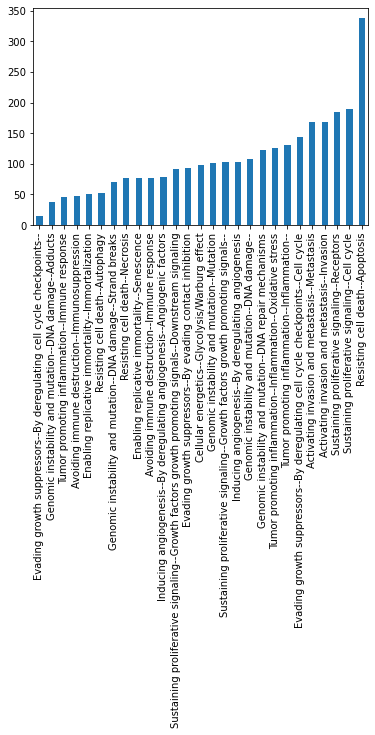

In [ ]:
ll_ = train_df.columns.tolist()[1:-1]
train_df[ll_].sum().sort_values().plot(kind="bar");

In [ ]:
sub_data['Text_files']

0       Background .\nOver the past ten years oncologi...
1       Treatment for glioblastoma multiforme includes...
2       Prostate cancer ( PCA ) is the most common inv...
3       Splenic haemangiosarcomas ( HSAs ) from 122 do...
4       Application of adenovirus vectors ( Adv ) in m...
                              ...                        
1846    Disruption of contact inhibition and serum aff...
1847    Base analogs are powerful antimetabolites and ...
1848    Prostaglandin E(2) ( PGE(2) ) receptor subtype...
1849    Androgen deprivation is currently a standard-o...
1850    Deregulation of insulin-like growth factor-1 r...
Name: Text_files, Length: 1851, dtype: object

In [ ]:
train_df[ll_]

,Activating invasion and metastasis--Invasion,Inducing angiogenesis--By deregulating angiogenesis--Angiogenic factors,Evading growth suppressors--By deregulating cell cycle checkpoints--,Evading growth suppressors--By deregulating cell cycle checkpoints--Cell cycle,Evading growth suppressors--By evading contact inhibition,Avoiding immune destruction--Immune response,Genomic instability and mutation--Mutation,Tumor promoting inflammation--Inflammation--,Resisting cell death--Apoptosis,Enabling replicative immortality--Immortalization,...,Tumor promoting inflammation--Immune response,Resisting cell death--Necrosis,Genomic instability and mutation--DNA damage--Strand breaks,Sustaining proliferative signaling--Receptors,Sustaining proliferative signaling--Growth factors growth promoting signals--Downstream signaling,Inducing angiogenesis--By deregulating angiogenesis,Activating invasion and metastasis--Metastasis,Tumor promoting inflammation--Inflammation--Oxidative stress,Enabling replicative immortality--Senescence,Resisting cell death--Autophagy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1847,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1849,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE



In [ ]:
ll_

['Activating invasion and metastasis--Invasion',
 'Inducing angiogenesis--By deregulating angiogenesis--Angiogenic factors',
 'Evading growth suppressors--By deregulating cell cycle checkpoints--',
 'Evading growth suppressors--By deregulating cell cycle checkpoints--Cell cycle',
 'Evading growth suppressors--By evading contact inhibition',
 'Avoiding immune destruction--Immune response',
 'Genomic instability and mutation--Mutation',
 'Tumor promoting inflammation--Inflammation--',
 'Resisting cell death--Apoptosis',
 'Enabling replicative immortality--Immortalization',
 'Avoiding immune destruction--Immunosuppression',
 'Genomic instability and mutation--DNA damage--Adducts',
 'Genomic instability and mutation--DNA damage--',
 'Sustaining proliferative signaling--Cell cycle',
 'Cellular energetics--Glycolysis/Warburg effect',
 'Genomic instability and mutation--DNA repair mechanisms',
 'Sustaining proliferative signaling--Growth factors growth promoting signals--',
 'Tumor promoting 

In [ ]:
df = sub_data.drop(sub_data[sub_data[ll_[8]] == sub_data['sum']].index)
df = df.drop(df[df['sum']==2].index)


In [ ]:
sub_data['sum'] = sub_data[ll_].sum(axis=1)
sub_data.head()

,Text_files,Activating invasion and metastasis--Invasion,Inducing angiogenesis--By deregulating angiogenesis--Angiogenic factors,Evading growth suppressors--By deregulating cell cycle checkpoints--,Evading growth suppressors--By deregulating cell cycle checkpoints--Cell cycle,Evading growth suppressors--By evading contact inhibition,Avoiding immune destruction--Immune response,Genomic instability and mutation--Mutation,Tumor promoting inflammation--Inflammation--,Resisting cell death--Apoptosis,...,Resisting cell death--Necrosis,Genomic instability and mutation--DNA damage--Strand breaks,Sustaining proliferative signaling--Receptors,Sustaining proliferative signaling--Growth factors growth promoting signals--Downstream signaling,Inducing angiogenesis--By deregulating angiogenesis,Activating invasion and metastasis--Metastasis,Tumor promoting inflammation--Inflammation--Oxidative stress,Enabling replicative immortality--Senescence,Resisting cell death--Autophagy,sum
0,Background .\nOver the past ten years oncologi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,Treatment for glioblastoma multiforme includes...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,Prostate cancer ( PCA ) is the most common inv...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Splenic haemangiosarcomas ( HSAs ) from 122 do...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Application of adenovirus vectors ( Adv ) in m...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# data = df


In [ ]:
data.shape

(1851, 12)

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=42)
val , test = train_test_split(data, test_size=0.1, random_state=42)

sub_train, sub_test = train_test_split(sub_data, test_size=0.3, random_state=42)
sub_val , sub_test = train_test_split(sub_data, test_size=0.1, random_state=42)

In [ ]:
df = df.drop(df[sub_data['sum']==0].index)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


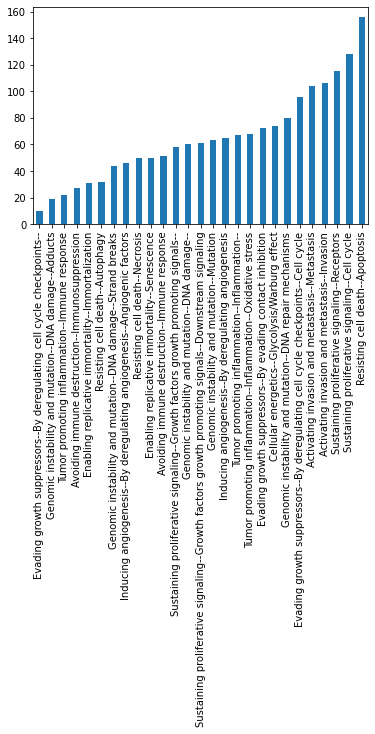

In [ ]:
ll_ = df.columns.tolist()[1:-1]
df[ll_].sum().sort_values().plot(kind="bar");